In [22]:
import os
if not os.path.exists('thinkdsp.py'):
         !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [23]:
from thinkdsp import*
import numpy as np
import matplotlib.pyplot as plt

# creating function 

In [24]:
def make_sine(offset):
    signal=SinSignal(freq=440,offset=offset)
    wave=signal.make_wave(duration=4,framerate=11025)
    return wave

In [25]:
wave1=make_sine(0)
wave2=make_sine(1)


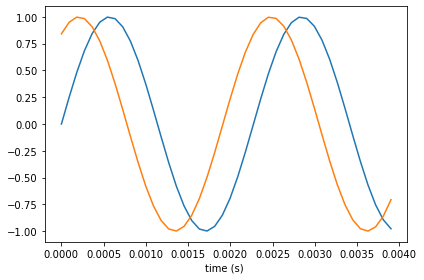

In [26]:
wave1.segment(duration=0.004).plot()
wave2.segment(duration=0.004).plot()
decorate(xlabel='time (s) ')

In [27]:
cor_matrix=np.corrcoef(wave1.ys,wave2.ys)
print(cor_matrix)

[[1.         0.54030231]
 [0.54030231 1.        ]]


In [28]:
wave1.corr(wave2)

0.5403023058681397

Serial Correlation

In [29]:
def serial_corr(wave,lag=1):
    n=len(wave)
    y1=wave.ys[lag:]
    y2=wave.ys[:n-lag]
    corr=np.corrcoef(y1,y2)[0,1]
    return corr


In [39]:
signal2=UncorrelatedGaussianNoise()
wave0=signal2.make_wave(duration=4,framerate=11025)
serial_corr(wave0)

signal3=BrownianNoise()
wave3=signal3.make_wave(duration=4,framerate=11025)
serial_corr(wave3)
signal4=PinkNoise(beta=1)
wave4=signal4.make_wave(duration=4,framerate=11025)
serial_corr(wave3)


0.9998767667631939

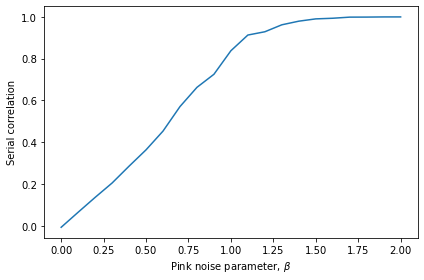

In [31]:
np.random.seed(19)

betas = np.linspace(0,2,21)
corrs = []

for beta in betas:
    signal =  PinkNoise(beta=beta)
    wave = signal.make_wave(duration=4, framerate=11025)
    corr = serial_corr(wave)
    corrs.append(corr)
    
plt.plot(betas, corrs)
decorate(xlabel=r'Pink noise parameter, $\beta$',
         ylabel='Serial correlation')

In [32]:
def autocorr(wave):
    """Computes and plots the autocorrelation function.

    wave: Wave
    
    returns: tuple of sequences (lags, corrs)
    """
    lags = np.arange(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

In [33]:
def plot_pink_autocorr(beta, label):
    signal = PinkNoise(beta=beta)
    wave = signal.make_wave(duration=1.0, framerate=10000)
    lags, corrs = autocorr(wave)
    plt.plot(lags, corrs, label=label)

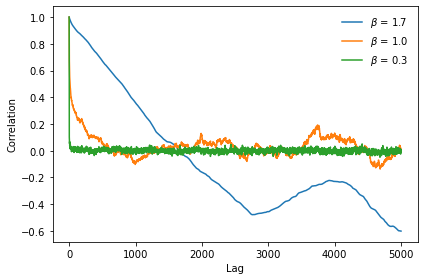

In [34]:
np.random.seed(19)

for beta in [1.7, 1.0, 0.3]:
    label = r'$\beta$ = %.1f' % beta
    plot_pink_autocorr(beta, label)

decorate(xlabel='Lag', 
         ylabel='Correlation')

In [15]:
wave=read_wave('28042__bcjordan__voicedownbew.wav')
wave.normalize()
wave.make_audio()


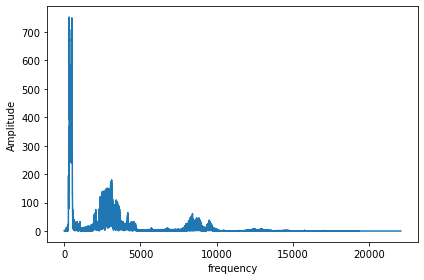

In [16]:
spectrum=wave.make_spectrum()
spectrum.plot()
decorate(xlabel='frequency',ylabel='Amplitude')

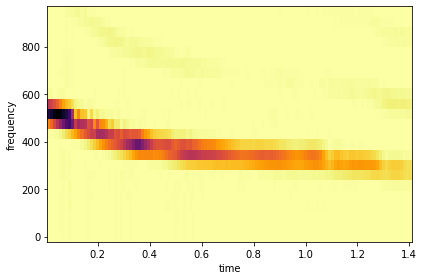

In [17]:
spectro=wave.make_spectrogram(seg_length=1024)
spectro.plot(high=1000)
decorate(xlabel='time',ylabel='frequency')

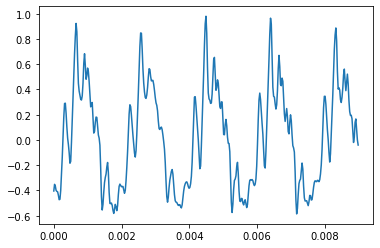

In [18]:
segmnet=wave.segment(start=0,duration=0.009)
segmnet.plot()

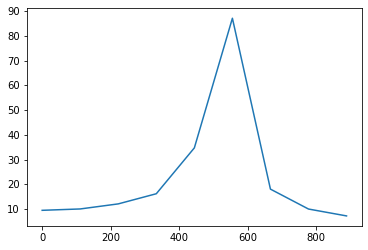

In [19]:
segmnet.make_spectrum().plot(high=1000)

In [20]:
len(segmnet),segmnet.framerate,spectrum.freq_res

(397, 44100, 0.700266768292683)

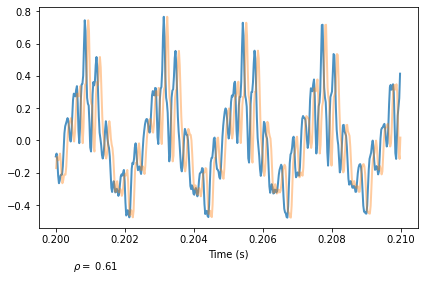

In [21]:
def plot_shifted(wave, offset=0.001, start=0.2):
    segment1 = wave.segment(start=start, duration=0.01)
    segment1.plot(linewidth=2, alpha=0.8)

    # start earlier and then shift times to line up
    segment2 = wave.segment(start=start-offset, duration=0.01)
    segment2.shift(offset)
    segment2.plot(linewidth=2, alpha=0.4)

    corr = segment1.corr(segment2)
    text = r'$\rho =$ %.2g' % corr
    plt.text(segment1.start+0.0005, -0.8, text)
    decorate(xlabel='Time (s)')

plot_shifted(wave, 0.0001)